<!--NAVIGATION-->
< [Intervalo de Confiança, Margem de Erro, Acurácia e Precisão](002.Intervalo-de-Confiança-Margem-de-Erro-Acurácia-e-Precisão.ipynb) | [Conteúdo](Index.ipynb) | [Tamanho da Amostra, Variância e Viés](004.Tamanho-da-Amostra-Variância-e-Viés.ipynb) >

<a href="https://colab.research.google.com/github/fmafonseca/statistical-thinking-data-science/blob/master/notebooks/003.Para-que-serve-uma-amostra-de-tamanho-grande.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Para que serve uma amostra de tamanho grande?

Uma vez que as observações são **independentes** (***independents***) e a distribuição da **<font color=orange>população</font>** (***<font color=orange>population</font>***) destas observações não é muito **enviesada** (***skewed***), então, o fato de termos **<font color=gray>amostras aleatórias</font>** (***<font color=gray>random samples</font>***) grandes garante que:
1. Teremos uma **<font color=blue>distribuição amostral</font>** (***<font color=blue>sampling distribution</font>***) da média que é aproximadamente Normal (como já foi visto [aqui](001.Teorema-Central-do-Limite.ipynb));
2. A estimativa para o **<font color=blue>erro padrão</font>** (***<font color=blue>standard error</font>***) $SE$ desta **<font color=blue>distribuição amostral</font>** (***<font color=blue>sampling distribution</font>***) será confiável.

Então, para verificarmos o ponto 2, considere que a distribuição da **<font color=orange>população</font>** (***<font color=orange>population</font>***) seja dada por

$$
\textrm{pop} \sim N \left( \mu=0, \sigma=1 \right)
$$

ou seja, uma **<font color=orange>população</font>** (***<font color=orange>population</font>***) com média $\mu = 0$ e desvio padrão $\sigma = 1$.

In [1]:
from scipy import stats as st

# Definition of the population distribution
pop_par_mu = 0
pop_par_sd = 1
pop_distribution = st.norm(loc=pop_par_mu, scale=pop_par_sd)

Considere que iremos coletar $m$ **<font color=gray>amostras aleatórias</font>** (***<font color=gray>random samples</font>***) desta **<font color=orange>população</font>** (***<font color=orange>population</font>***) onde $m=$ `sampling_distribution_size`. Considere também que cada uma destas $m$ **<font color=gray>amostras aleatórias</font>** (***<font color=gray>random samples</font>***) tenha um tamanho $n$, onde $n=$ `random_sample_size`.

![pop-sample-sampling](figures/pop-sample-sampling.jpg)
<small>(Inspiração: [Inferential Statistics](https://www.coursera.org/learn/inferential-statistics-intro/home/welcome), by Duke University, at Coursera)</small>

Se calcularmos a média de cada uma destas $m$ **<font color=gray>amostras aleatórias</font>** (***<font color=gray>random samples</font>***), então, teremos uma **<font color=blue>distribuição amostral</font>** (***<font color=blue>sampling distribution</font>***) das médias, denotada no código por `sampling_distribution_of_means`.

A partir da **<font color=blue>distribuição amostral</font>** (***<font color=blue>sampling distribution</font>***) das médias nós podemos:
1. **Estimar um valor** $\hat{\mu}$ (`estimated_mean`) para a média $\mu$ da **<font color=orange>população</font>** (***<font color=orange>population</font>***);
2. **Estimar o grau de precisão** $SE$ (`standard_error_sampling_dist`) com o qual este valor estimado $\hat{\mu}$ (`estimated_mean`) representa a média $\mu$ da **<font color=orange>população</font>** (***<font color=orange>population</font>***).

Esta estimativa do grau de precisão é dada pelo **<font color=blue>erro padrão</font>** (***<font color=blue>standard error</font>***), cuja definição pela wikidepia é a seguinte:

>*The standard error (SE) of a statistic (usually an estimate of a parameter) is the standard deviation of its sampling distribution or an estimate of that standard deviation. If the parameter or the statistic is the mean, it is called the standard error of the mean (SEM)*
<small>(Fonte: https://en.wikipedia.org/wiki/Standard_error)</small>

Primeiramente, o que queremos verificar aqui é se a precisão dada pelo **<font color=blue>erro padrão</font>** (***<font color=blue>standard error</font>***) aumenta na medida em que o tamanho $n$ das **<font color=gray>amostras aleatórias</font>** (***<font color=gray>random samples</font>***) também aumenta.

In [2]:
import numpy as np

random_sample_sizes = [10, 30, 100, 500, 1000, 5000, 10000, 50000, 100000]
sampling_distribution_size = 1000
estimated_means = []
standard_errors = []
for random_sample_size in random_sample_sizes:
    sampling_distribution_of_means = []
    for _ in range(sampling_distribution_size):
        random_sample = pop_distribution.rvs(size=random_sample_size)
        sampling_distribution_of_means.append(np.mean(random_sample))

    estimated_mean = np.mean(sampling_distribution_of_means)
    estimated_means.append(estimated_mean)
    
    standard_error_sampling_dist = np.std(sampling_distribution_of_means)
    standard_errors.append(standard_error_sampling_dist)

In [3]:
import pandas as pd
import altair as alt
alt.renderers.enable('notebook') # for the notebook only (not for JupyterLab) run this command once per session

def plot_truemean_estimatedmean_ME(true_mean, estimated_means, estimated_standard_errors, random_sample_sizes):
    data = pd.DataFrame({
        'true_mean': true_mean, 'random_sample_size': random_sample_sizes, 
        'estimated_mean': estimated_means, 'estimated_se': estimated_standard_errors
    })
    
    true_mean_plot = alt.Chart(data).mark_rule(color='red').encode(
        y='true_mean:Q',
        size=alt.value(1)
    )
    
    estimated_mean_plot = alt.Chart(data).mark_line().encode(
        x='random_sample_size:O',
        y='estimated_mean'
    )
    
    margin_of_error_plot = alt.Chart(data).mark_area(opacity=0.3).encode(
        x='random_sample_size:O',
        y='mu_hat_sup:Q',
        y2='mu_hat_inf:Q'
    ).transform_calculate(
        mu_hat_sup='datum.estimated_mean + (1.96*datum.estimated_se)',
        mu_hat_inf='datum.estimated_mean - (1.96*datum.estimated_se)',
    )
    
    chart1 = (estimated_mean_plot + margin_of_error_plot).properties(title='Estimated Mean +- 1.96*SE')
    chart2 = (true_mean_plot + margin_of_error_plot).properties(title='True mean (in red)')
    chart3 = (true_mean_plot + estimated_mean_plot).properties(title='True (red) and Estimated (blue) means')
    
    return chart1 | chart2 | chart3

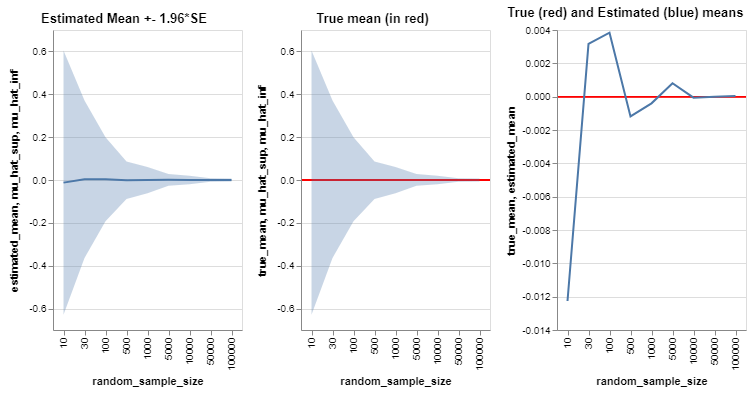

In [4]:
plot_truemean_estimatedmean_ME(pop_par_mu, estimated_means, standard_errors, random_sample_sizes)

Os gráficos acima, da esquerda para a direita, representam:
 - *Esquerda*:
   - curva azul representando as estimativas ($\hat{\mu}$) para a média $\mu$ da **<font color=orange>população</font>** (***<font color=orange>population</font>***) para cada um dos tamanhos $n$ (`random_sample_size`) que foram simulados;
   - área azul representando o intervalo de confiança de $95\%$ ($\hat{\mu} \pm 1.96 \times SE$) das estimativas $\hat{\mu}$.
 - *Centro*:
   - curva vermelha representando a média $\mu$ da **<font color=orange>população</font>** (***<font color=orange>population</font>***);
   - área azul idem ao gráfico da *esquerda*.
 - *Direita*:
   - curva vermelha idem ao gráfico do *meio*;
   - curva azul idem ao gráfico da *esquerda*;

***
<mark>Logo, é possível perceber que na medida em que o tamanho $n$ (`random_sample_size`) das <strong><font color=gray>amostras aleatórias</font></strong> (<strong><em><font color=gray>random samples</font></em></strong>) aumenta, o <strong>grau de precisão</strong> $SE$ da estimativa $\hat{\mu}$ também aumenta (ou seja, a <strong>margem de erro</strong> reduz, reduzindo também a largura do <strong>intervalo de confiança</strong>). </mark>
***
    
Além disto, pelo **Teorema Central do Limite** (***Central Limit Theorem - CLT***) temos que: a distribuição de **estatísticas de uma amostra** (***sample statistics***) é aproximadamente normal (***nearly normal***), centrada na média $\mu$ da **<font color=orange>população</font>** (***<font color=orange>population</font>***), e com um **desvio padrão** (***standard deviation***) igual ao **desvio padrão** (***standard deviation***) da **<font color=orange>população</font>** (***<font color=orange>population</font>***) dividido pela raiz quadrada do tamanho $n$ da amostra.

$$
\hat{\mu} \sim N\left(mean=\mu, SE=\frac{\sigma}{\sqrt{n}}\right)
$$

No entanto, nem sempre temos o **desvio padrão** (***standard deviation***) $\sigma$ da **<font color=orange>população</font>** (***<font color=orange>population</font>***). Nestes casos, tipicamente, o **desvio padrão** (***standard deviation***) $\sigma$ da **<font color=orange>população</font>** (***<font color=orange>population</font>***) é estimado como sendo o **desvio padrão** $s$ (***standard deviation***) da **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample</font>***) em questão. Então, uma estimativa para o **<font color=blue>erro padrão</font>** (***<font color=blue>standard error</font>***) da **<font color=blue>distribuição amostral</font>** (***<font color=blue>sampling distribution</font>***) a partir de uma **<font color=gray>amostra aleatória</font>** (***<font color=gray>random sample</font>***) de tamanho $n$ é dada por:

$$
\hat{se} = \frac{s}{\sqrt{n}}
$$

O que queremos verificar aqui é se esta estimativa $\hat{se}$ para o **<font color=blue>erro padrão</font>** (***<font color=blue>standard error</font>***) fica mais precisa na medida em que o tamanho $n$ das **<font color=gray>amostras aleatórias</font>** (***<font color=gray>random samples</font>***) aumenta.

In [5]:
def estimate_SEs(pop_distribution, random_sample_sizes):
    estimated_standard_errors = []
    for random_sample_size in random_sample_sizes:
        random_sample = pop_distribution.rvs(size=random_sample_size)
        estimated_standard_error = np.std(random_sample) / np.sqrt(random_sample_size)
        estimated_standard_errors.append(estimated_standard_error)
    return estimated_standard_errors

estimated_standard_errors1 = estimate_SEs(pop_distribution, random_sample_sizes)
estimated_standard_errors2 = estimate_SEs(pop_distribution, random_sample_sizes)
estimated_standard_errors3 = estimate_SEs(pop_distribution, random_sample_sizes)

In [6]:
def plot_true_and_estimated_standarderror(standard_errors, estimated_standard_errors, random_sample_sizes):
    data = pd.DataFrame({
        'SE': standard_errors,
        'estimated_SE': estimated_standard_errors,
        'random_sample_size': random_sample_sizes, 
    })
    
    SE_plot = alt.Chart(data).mark_line(color='red', opacity=1).encode(
        x='random_sample_size:O',
        y='SE:Q'
    )
    
    estimated_SE_plot = alt.Chart(data).mark_line(opacity=1).encode(
        x='random_sample_size:O',
        y='estimated_SE:Q'
    )
    
    return SE_plot + estimated_SE_plot

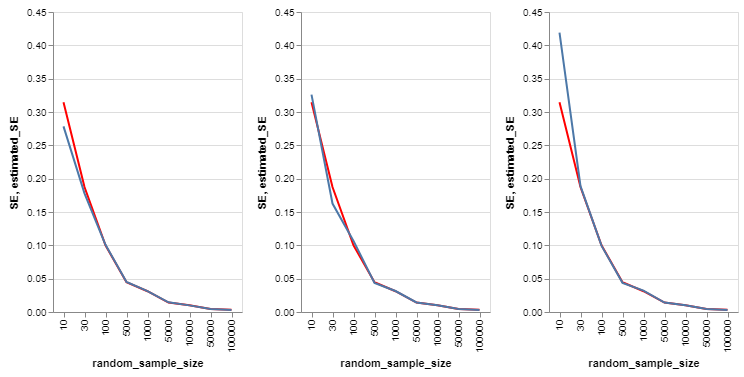

In [7]:
chart1 = plot_true_and_estimated_standarderror(standard_errors, estimated_standard_errors1, random_sample_sizes)
chart2 = plot_true_and_estimated_standarderror(standard_errors, estimated_standard_errors2, random_sample_sizes)
chart3 = plot_true_and_estimated_standarderror(standard_errors, estimated_standard_errors3, random_sample_sizes)

chart = (chart1 | chart2 | chart3).resolve_scale(y='shared')
chart

Os gráficos acima representam 3 comparações entre o **<font color=blue>erro padrão</font>** $SE$ (***<font color=blue>standard error</font>***) da **<font color=blue>distribuição amostral</font>** (***<font color=blue>sampling distribution</font>***) e a estimativa $\hat{se}$ deste **<font color=blue>erro padrão</font>** $SE$ (***<font color=blue>standard error</font>***). A curva azul representa a estimativa $\hat{se}$ por tamanho de amostra ($n$) enquanto que a curva vermelha representa o $SE$.
 
***
<mark>Logo, é possível perceber que na medida em que o tamanho $n$ (`random_sample_size`) das <strong><font color=gray>amostras aleatórias</font></strong> (<strong><em><font color=gray>random samples</font></em></strong>) aumenta, a estimativa $\hat{se}$ se aproxima do valor de $SE$. </mark>
***

*Referências*:
 - https://en.wikipedia.org/wiki/Standard_error
 - https://en.wikipedia.org/wiki/Margin_of_error

<!--NAVIGATION-->
< [Intervalo de Confiança, Margem de Erro, Acurácia e Precisão](002.Intervalo-de-Confiança-Margem-de-Erro-Acurácia-e-Precisão.ipynb) | [Conteúdo](Index.ipynb) | [Tamanho da Amostra, Variância e Viés](004.Tamanho-da-Amostra-Variância-e-Viés.ipynb) >

<a href="https://colab.research.google.com/github/fmafonseca/statistical-thinking-data-science/blob/master/notebooks/003.Para-que-serve-uma-amostra-de-tamanho-grande.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>